<a href="https://colab.research.google.com/github/ME-UoP-ME421/Rankine-RF/blob/main/Updated_Codes_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import necessary libraries
import numpy as np

# Define the parameters of the system
num_plates = 4              # Number of plates
num_masses = 2              # Number of unbalanced masses on each plate
m_plate = 0.5               # Mass of each plate (kg)
m_mass = 0.1                # Mass of each unbalanced mass (kg)
k_spring = 1000             # Spring constant of the elastic connection (N/m)
l_mass = 0.1                # Distance between the center of mass of the unbalanced masses on each plate (m)
l_plate = 0.2               # Distance between the axis of rotation and the center of mass of each plate (m)
g = 9.81                    # Acceleration due to gravity (m/s^2)

# Compute the total mass of each plate
m_total = m_plate + num_masses * m_mass

# Compute the distance between the axis of rotation and the center of mass of the system
l_system = (num_plates * m_total * l_plate) / (num_plates * m_total + 4 * num_masses * m_mass)

# Compute the moment of inertia of each plate
I_plate = (1/12) * m_plate * (3 * l_plate**2 + 1/4 * m_total**2)

# Compute the moment of inertia of each unbalanced mass
I_mass = (1/12) * m_mass * (3 * l_mass**2 + 1/4 * m_mass**2)

# Compute the moment of inertia of the system
I_system = num_plates * I_plate + 4 * num_masses * I_mass + m_total * l_system**2

# Print the parameters of the system
print("Parameters of the system:")
print("Number of plates:", num_plates)
print("Number of unbalanced masses on each plate:", num_masses)
print("Mass of each plate (kg):", m_plate)
print("Mass of each unbalanced mass (kg):", m_mass)
print("Spring constant of the elastic connection (N/m):", k_spring)
print("Distance between the center of mass of the unbalanced masses on each plate (m):", l_mass)
print("Distance between the axis of rotation and the center of mass of each plate (m):", l_plate)
print("Acceleration due to gravity (m/s^2):", g)
print("Total mass of each plate (kg):", m_total)
print("Distance between the axis of rotation and the center of mass of the system (m):", l_system)
print("Moment of inertia of each plate (kg*m^2):", I_plate)
print("Moment of inertia of each unbalanced mass (kg*m^2):", I_mass)
print("Moment of inertia of the system (kg*m^2):", I_system)


Parameters of the system:
Number of plates: 4
Number of unbalanced masses on each plate: 2
Mass of each plate (kg): 0.5
Mass of each unbalanced mass (kg): 0.1
Spring constant of the elastic connection (N/m): 1000
Distance between the center of mass of the unbalanced masses on each plate (m): 0.1
Distance between the axis of rotation and the center of mass of each plate (m): 0.2
Acceleration due to gravity (m/s^2): 9.81
Total mass of each plate (kg): 0.7
Distance between the axis of rotation and the center of mass of the system (m): 0.15555555555555556
Moment of inertia of each plate (kg*m^2): 0.010104166666666666
Moment of inertia of each unbalanced mass (kg*m^2): 0.0002708333333333334
Moment of inertia of the system (kg*m^2): 0.0595216049382716


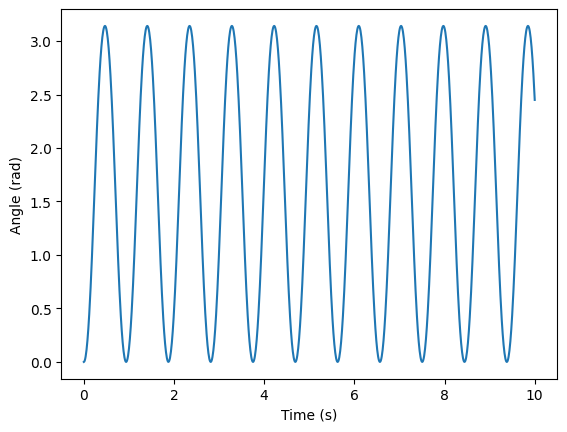

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the parameters of the system
m = 0.1  # Mass of each plate (kg)
r = 0.1  # Distance from shaft to each plate (m)
I = 4 * m * r**2  # Moment of inertia of the system (kg*m^2)
omega = 10  # Angular velocity of the system (rad/s)
m_prime = 0.05  # Mass of point mass (kg)
r_prime = 0.05  # Distance of point mass from shaft (m)

# Define the differential equation for the system
def eq_of_motion(theta, t):
    dtheta_dt = theta[1]
    d2theta_dt2 = (m_prime * r_prime * omega**2 * np.cos(theta[0])) / I
    return [dtheta_dt, d2theta_dt2]

# Define the initial conditions for the system
theta_0 = [0, 0]

# Define the time array for the simulation
t = np.linspace(0, 10, 1000)

# Solve the differential equation numerically
theta = odeint(eq_of_motion, theta_0, t)

# Plot the motion of the system
plt.plot(t, theta[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.show()


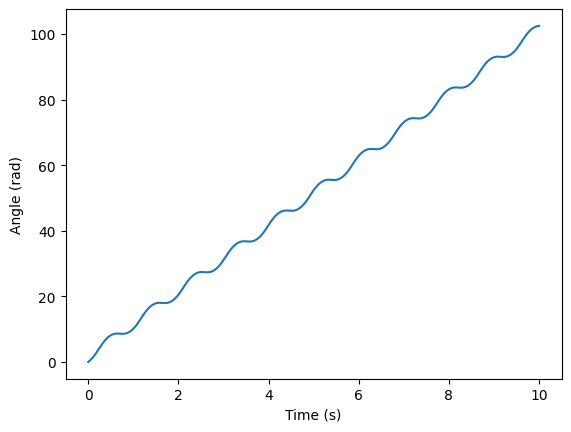

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the parameters of the system
m = 0.1  # Mass of each plate (kg)
r = 0.1  # Distance from shaft to each plate (m)
I = 4 * m * r**2  # Moment of inertia of the system (kg*m^2)
omega = 10  # Angular velocity of the system (rad/s)
m_prime = 0.05  # Mass of point mass (kg)
r_prime = 0.05  # Distance of point mass from shaft (m)

# Define the differential equation for the system
def eq_of_motion(theta, t):
    dtheta_dt = theta[1]
    d2theta_dt2 = (m_prime * r_prime * omega**2 * np.cos(theta[0])) / I
    return [dtheta_dt, d2theta_dt2]

# Define the initial conditions for the system
theta_0 = [0, 0]

# Define the time array for the simulation
t = np.linspace(0, 10, 1000)

# Solve the differential equation numerically
theta = odeint(eq_of_motion, theta_0, t)

# Compute the angular position of the system over time
theta_t = theta[:, 0] + omega * t

# Plot the motion of the system
plt.plot(t, theta_t)
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.show()


/usr/local/lib/python3.9/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


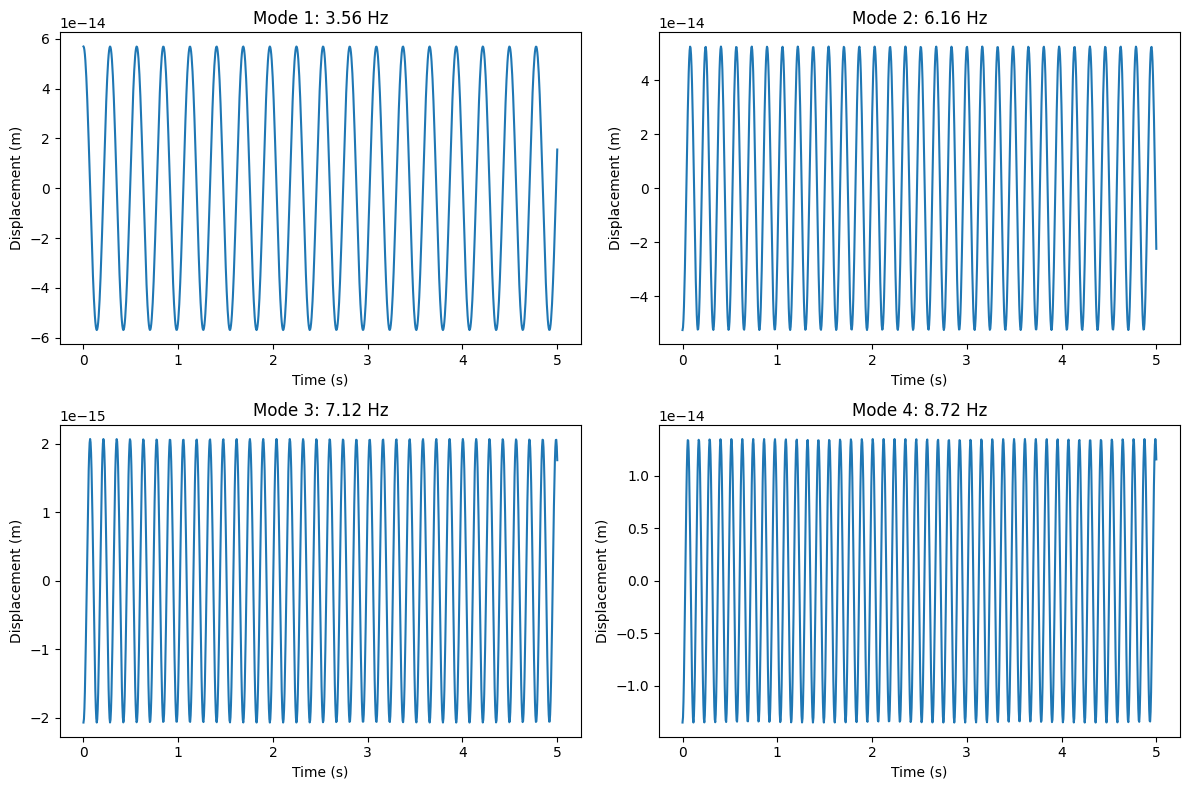

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants and parameters
m = 0.02 # mass of the plates in kg
r = 0.05 # radius of the plates in m
k = 4000.0 # stiffness of the springs in N/m
c = 0.05 # damping coefficient in Ns/m
l = 0.1 # length of the flexible stem in m
g = 9.81 # acceleration due to gravity in m/s^2
n = 4 # number of plates

# Derive mass and stiffness matrices
M = np.diag([m]*n)
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            K[i,j] = k + 2*k*(1-np.cos(2*np.pi*(i+1)/5))
        elif (i-j)%2 == 1:
            K[i,j] = -k
K *= r**2

# Solve for natural frequencies and modes
omega_sq, V = eigh(K, M)
omega = np.sqrt(omega_sq)
freqs = omega/(2*np.pi)
modes = V.T

# Plot modes of resonance
t = np.linspace(0, 5, 1000)
x_modes = []
for i in range(4):
    x_mode = []
    for j in range(n):
        x_j = modes[i,j]*np.sin(j*np.pi/l)*np.cos(omega[i]*t)
        x_mode.append(x_j)
    x_modes.append(np.sum(x_mode, axis=0))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    ax.plot(t, x_modes[i])
    ax.set_title(f"Mode {i+1}: {freqs[i]:.2f} Hz")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Displacement (m)")
plt.tight_layout()
plt.show()
